c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:618: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


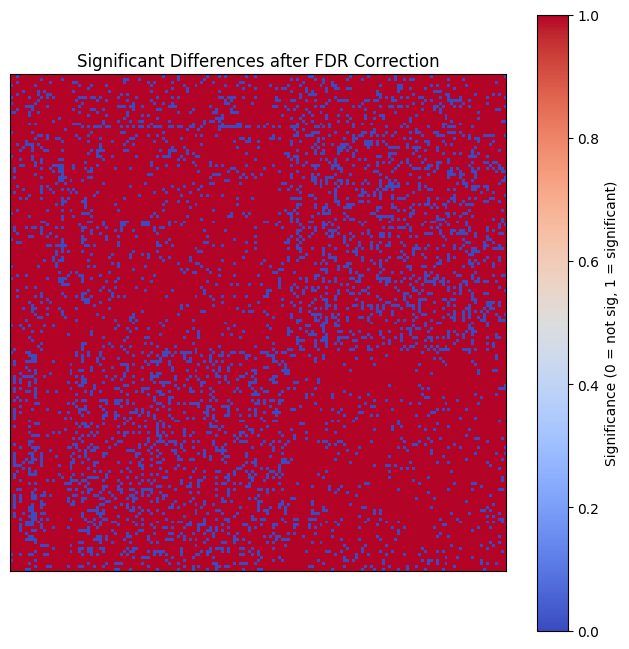

In [1]:
import torch
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import fdrcorrection

# Function to do t-test and FDR correction
def piecewise_ttest_fdr(samples, labels, alpha=0.05):
    samples = torch.tensor(samples)
    labels = torch.tensor(labels)
    
    group0 = samples[labels == 0]
    group1 = samples[labels == 1]

    t_stat, p_vals = stats.ttest_ind(group0, group1, axis=0, equal_var=False)

    p_vals_flat = p_vals.flatten()
    reject, p_vals_corrected = fdrcorrection(p_vals_flat, alpha=alpha)

    significant_mask = reject.reshape(p_vals.shape)

    return significant_mask, p_vals, p_vals_corrected

# Load data
data = scipy.io.loadmat(r"C:\Users\Administrator\Desktop\brian network\892finalproj\generated_samples_10ep.mat")
samples = data['samples']  # shape (800, 167, 167)
labels = data['labels'].flatten()  # shape (800,)

# Run piecewise t-test and FDR
significant_mask, raw_pvals, corrected_pvals = piecewise_ttest_fdr(samples, labels, alpha=0.05)

# Plot the significant mask
plt.figure(figsize=(8, 8))
plt.imshow(significant_mask, cmap='coolwarm', interpolation='nearest')
plt.title("Significant Differences after FDR Correction")
plt.colorbar(label='Significance (0 = not sig, 1 = significant)')
plt.xticks([])
plt.yticks([])
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2200\2627208759.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  samples = torch.tensor(samples)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2200\2627208759.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)


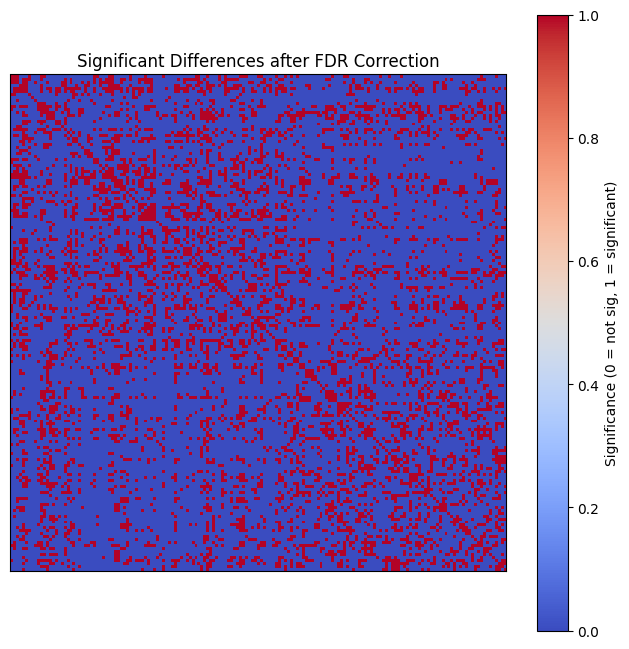

In [6]:
samples = torch.tensor(data['samples'], dtype=torch.float32)  # Now a tensor
samples = samples.squeeze(1)  # Add channel dimension if needed
labels = torch.tensor(data['labels'].flatten(), dtype=torch.float32)  # # shape (800,)

# Run piecewise t-test and FDR
significant_mask, raw_pvals, corrected_pvals = piecewise_ttest_fdr(samples, labels, alpha=0.05)

# Plot the significant mask
plt.figure(figsize=(8, 8))
plt.imshow(significant_mask, cmap='coolwarm', interpolation='nearest')
plt.title("Significant Differences after FDR Correction")
plt.colorbar(label='Significance (0 = not sig, 1 = significant)')
plt.xticks([])
plt.yticks([])
plt.show()


(852, 1, 167, 167)